# Part 3: This part is about Fourier Transformation


In [60]:
## load dependancies

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [61]:
## this function is to do fourier transformation given any image input

def magnitude_phase_split(img):
    ## img is a one-channel image, either gray-scale or r/g/b channel

    ## this step calls numpy->fft2 to do fourier transformation
    dft = np.fft.fft2(img)

    ## shift the low-frequent signals to center
    dft_shift = np.fft.fftshift(dft)

    ## obtain the magnitude
    magnitude_spectrum = np.abs(dft_shift)

    ## obtain the phase
    phase_spectrum = np.angle(dft_shift)

    return magnitude_spectrum, phase_spectrum


def magnitude_phase_combine(img_m, img_p):
    ## combine magnitude and phase
    ## this step gives the chance to exchange the phase and magnitude from different images
    img_mandp = img_m*np.e**(1j*img_p)

    ## this step is doing inverse fourier transformation
    img_mandp = np.uint8(np.abs(np.fft.ifft2(img_mandp)))

    ## normalize the image pixel intensity
    img_mandp=img_mandp/np.max(img_mandp)*255
    return img_mandp

def log_process(img_m):
    ## this function is to change the scale of magnitude for better visualization
    dftAmpLog = 20*np.log(np.abs(img_m))
    return dftAmpLog


def mask_generation(img, r_out=20, r_in=2):
    ## this function is to generate a mask for img with inner/outer radius as r_in/r_out;
    rows, cols = img.shape
    crow, ccol = int(rows / 2), int(cols / 2)  # center

    mask = np.zeros((rows, cols), np.uint8)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                              ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
    mask[mask_area] = 1
    return mask




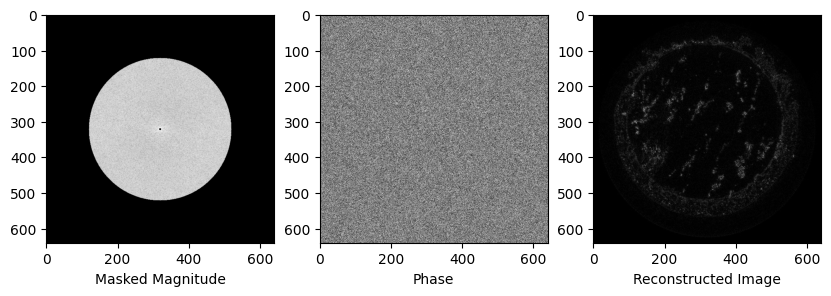

In [62]:
## read image
img_path = '/content/drive/My Drive/Colab Notebooks/Assignment1/Part3/'

img = cv2.imread(img_path+'alloy.png', 0)

## do fourier transformation
img_m, img_p = magnitude_phase_split(img)

img_mlog = log_process(img_m)

## generate a mask
mask = mask_generation(img, 200, 3)

# apply mask
img_mask = img_m * mask
img_mlog_mask = img_mlog*mask

## send the masked magnitude and phase to reconstruction
img_rec = magnitude_phase_combine(img_mask, img_p)

plt.figure(figsize=(10,12))
plt.subplot(131)
plt.xlabel("Masked Magnitude")
plt.imshow(img_mlog_mask, cmap="gray")
plt.subplot(132)
plt.xlabel("Phase")
plt.imshow(img_p, cmap="gray")
plt.subplot(133)
plt.imshow(img_rec, cmap="gray")
plt.xlabel("Reconstructed Image")

plt.show()

# TO DO

### Task 1:
To load two images and switch the phase and maganitude, and then visulize the output. **Note that the size of images are needed to be same.**

### Task 2:
To change the mask using different inner and outer radius to see the difference


### Task 3:
**Open Question**: Try to use Fourier Transformation to remove noise from image 'lena.jpg'



Now They have same size.


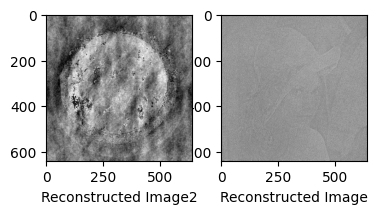

In [63]:
img_path = '/content/drive/My Drive/Colab Notebooks/Assignment1/Part3/'

img1 = cv2.imread(img_path+'alloy.png', 0)
img2 = cv2.imread(img_path+'lena.jpg', 0)
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))  # 调整 img2 尺寸与 img1 一致
    if img1.shape == img2.shape:
        print("Now They have same size.")
img1_m, img1_p = magnitude_phase_split(img1)
img1_mlog = log_process(img1_m)

img2_m, img2_p = magnitude_phase_split(img2)
img2_mlog = log_process(img2_m)



## send the masked magnitude and phase to reconstruction
img1_rec = magnitude_phase_combine(img1_m, img2_p)

img2_rec = magnitude_phase_combine(img2_m, img1_p)

plt.subplot(133)
plt.imshow(img1_rec, cmap="gray")
plt.xlabel("Reconstructed Image")
plt.subplot(132)
plt.imshow(img2_rec, cmap="gray")
plt.xlabel("Reconstructed Image2")

plt.show()

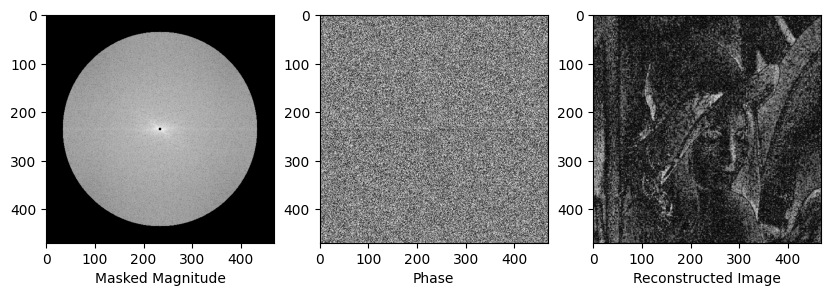

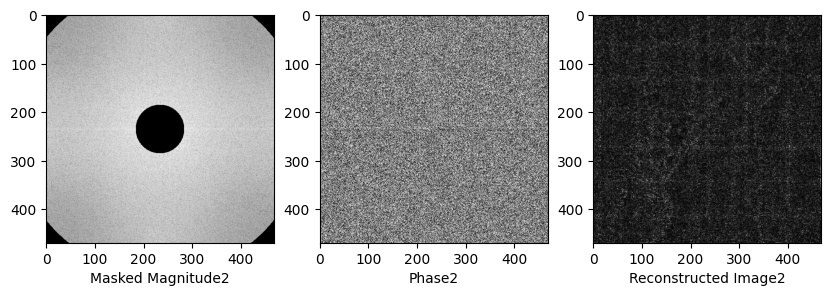

In [64]:

img = cv2.imread(img_path+'lena.jpg', 0)

## do fourier transformation
img_m, img_p = magnitude_phase_split(img)

img_mlog = log_process(img_m)

## generate a mask
mask = mask_generation(img, 200, 3)
mask2 = mask_generation(img, 300, 50)  # Adjust radii but keep the same image size

# Apply masks to the magnitude
img_mask = img_m * mask
img_mlog_mask = img_mlog * mask
img_mask2 = img_m * mask2  # Now mask2 has the same size as img_m
img_mlog_mask2 = img_mlog * mask2

# Reconstruct images using the masked magnitude and the original phase
img_rec = magnitude_phase_combine(img_mask, img_p)
img_rec2 = magnitude_phase_combine(img_mask2, img_p)

# Plot the results for the first mask
plt.figure(figsize=(10, 12))
plt.subplot(131)
plt.xlabel("Masked Magnitude")
plt.imshow(img_mlog_mask, cmap="gray")
plt.subplot(132)
plt.xlabel("Phase")
plt.imshow(img_p, cmap="gray")
plt.subplot(133)
plt.imshow(img_rec, cmap="gray")
plt.xlabel("Reconstructed Image")

# Plot the results for the second mask
plt.figure(figsize=(10, 12))
plt.subplot(131)
plt.xlabel("Masked Magnitude2")
plt.imshow(img_mlog_mask2, cmap="gray")
plt.subplot(132)
plt.xlabel("Phase2")
plt.imshow(img_p, cmap="gray")  # Use the same phase as before
plt.subplot(133)
plt.imshow(img_rec2, cmap="gray")
plt.xlabel("Reconstructed Image2")

plt.show()


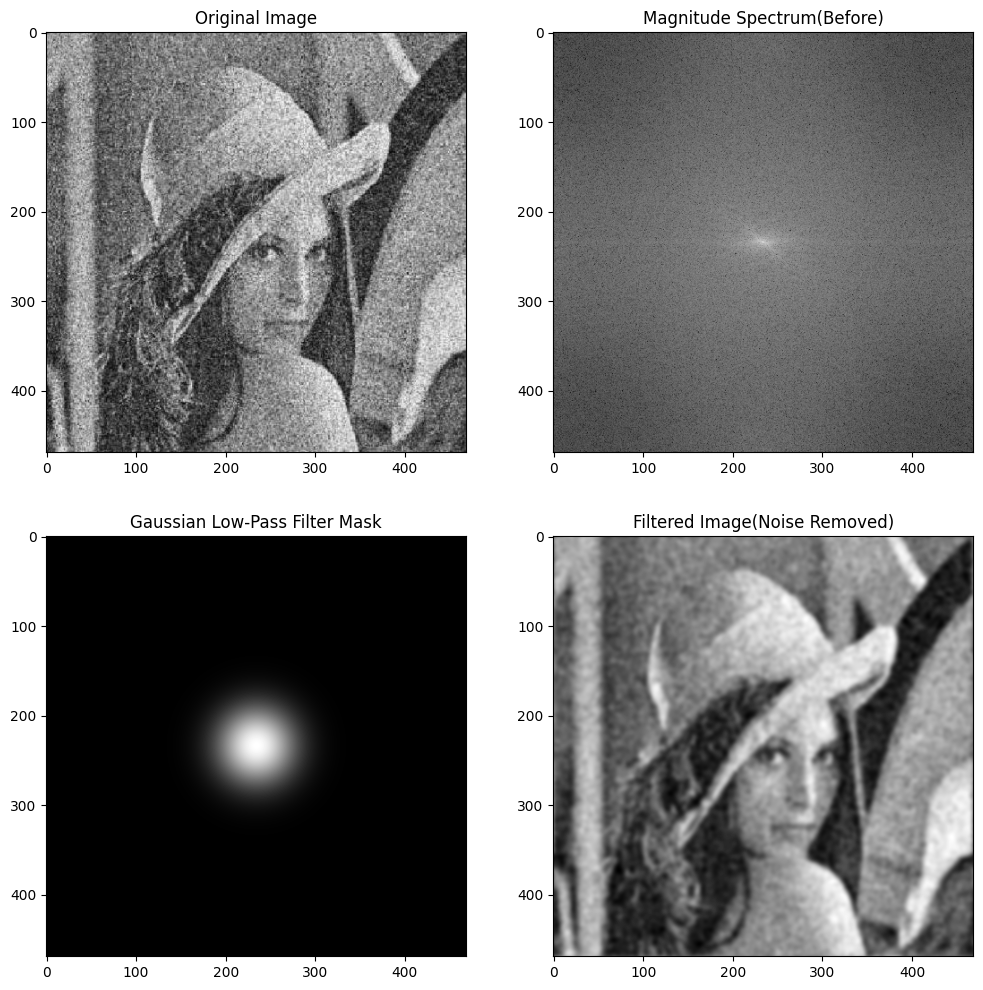

In [70]:
def gaussian_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow)**2 + (y - ccol)**2)
    mask = np.exp(-(distance**2) / (2 * (cutoff / 2.0)**2))
    return mask
img = cv2.imread(img_path+'lena.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
cutoff = 60
mask = gaussian_low_pass_filter((rows, cols), cutoff)
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=(12, 12))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image')
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.subplot(222), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum(Before)')
plt.subplot(223), plt.imshow(mask, cmap='gray')
plt.title('Gaussian Low-Pass Filter Mask')
plt.subplot(224), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image(Noise Removed)')
plt.show()